# NLTK Intro

**Natural Language Toolkit (NLTK)** is one of the most famous and leading platforms for building Python-based NLP applications. Other popular NLP libraries in Python are **spaCy**, **Gensim**, and **TextBlob**.

In [1]:
#conda install nltk

In [2]:
import nltk

NLTK comes with over 100 collections of large and well-structured text datasets, which are called corpora in NLP. Corpora can be used as dictionaries for checking word occurrences and as training pools for model learning and validating. Some useful and interesting corpora include Web Text corpus, Twitter samples, Shakespeare corpus, Sentiment Polarity, Names corpus, WordNet, and the Reuters benchmark corpus. The full list can be found at http://www.nltk.org/nltk_data. 

Before using any of these corpus resources, we need to first download them by running the following code in the Python interpreter:

In [3]:
# nltk.download()

# Bag of Words (BoW)

If we are only interested in the occurrence of certain words, their count, or a related measure, and not in the order of the words, we can view a text as a collection of words. This is called the **Bag of Words (BoW)** model. This is a very basic model, but it works pretty well in practice. Also see https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation.

# Stemming and lemmatization

We have two basic strategies to deal with words from the
same root: stemming and lemmatization. Stemming is a quicker approach that involves, if necessary, chopping off letters; for example, 'words' becomes 'word' after stemming. The result of stemming doesn't have to be a valid word. For instance, 'trying' and 'try' become 'tri'. Lemmatizing, on the other hand, is slower but more accurate. It performs a dictionary lookup and guarantees to return a valid word. 

# NLTK usage examples

In [4]:
from nltk.corpus import names

In [5]:
print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [6]:
print(len(names.words()))

7944


In [7]:
from nltk.tokenize import word_tokenize
sentence = 'I have been to U.K. and U.S.A.'
print(word_tokenize(sentence))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [8]:
tokens = word_tokenize(sentence)
print(nltk.pos_tag(tokens))

[('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'), ('to', 'TO'), ('U.K.', 'NNP'), ('and', 'CC'), ('U.S.A', 'NNP'), ('.', '.')]


In [9]:
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [10]:
nltk.help.upenn_tagset('VBP')

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [11]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
print(porter_stemmer.stem('machines'))
print(porter_stemmer.stem('learning'))

machin
learn


In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('machines'))
print(lemmatizer.lemmatize('learning'))

machine
learning


# Get the data

We will use the 20 newsgroup dataset, composed of text taken from newsgroup articles. It contains approximately 20,000 documents across 20 online newsgroups. The original data comes from http://qwone.com/~jason/20Newsgroups/, with 20 different topics listed.

Also see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

The scikit-learn library provides a utility function that loads the dataset. Once the dataset is downloaded, it's automatically cached. 

In [13]:
from sklearn.datasets import fetch_20newsgroups

In [14]:
groups = fetch_20newsgroups()

# Explore the data

In [15]:
type(groups)

sklearn.utils._bunch.Bunch

In [16]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [17]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [18]:
print(groups.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [19]:
groups.target_names[groups.target[0]]

'rec.autos'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

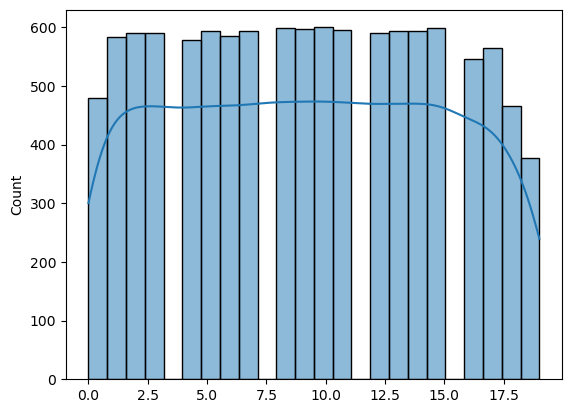

In [21]:
sns.histplot(groups.target, kde=True);

# Feature extraction and preprocessing

We begin by converting documents into a matrix where each row represents each newsgroup document and each column represents a word token, or specifically, a unigram to begin with. We are utilizing the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class from scikit-learn. To drop stop words, we simply need to specify the `stop_words` parameter. 

We can filter names with the Name corpus from NLTK. We will also remove numbers such as '00' and '000' and combinations of letters and numbers such as 'b8f'. 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [23]:
all_names = set(names.words())

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
# 500 most frequent tokens
count_vector = TfidfVectorizer(max_features=500, stop_words="english")

In [26]:
data_clean = []
for doc in groups.data:
    doc = doc.lower()
    doc_clean = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() 
                         if word.isalpha() and word not in all_names)
    data_clean.append(doc_clean)

In [27]:
data_clean_count = count_vector.fit_transform(data_clean)

In [28]:
print(count_vector.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE, as its name suggests, transforms data with a high number of dimensions into a lower-dimensional space, typically two or three dimensions, while preserving the similarity between data samples (neighbor information).

The process begins by creating a probability distribution that represents the neighbors surrounding each data point. Similar data points are assigned high probabilities, while dissimilar ones receive extremely small probabilities. The measurement of similarity and neighbor distances is typically based on the Euclidean distance or other relevant metrics.

Next, t-SNE constructs a projection of the data onto a low-dimensional space with the goal of minimizing the divergence between the input distribution and the output distribution. In this process, the original high-dimensional space is modeled as a Gaussian distribution, while the resulting low-dimensional space is modeled using the t-distribution.

We pick four distinct topics and visualize document vectors from these three topics.

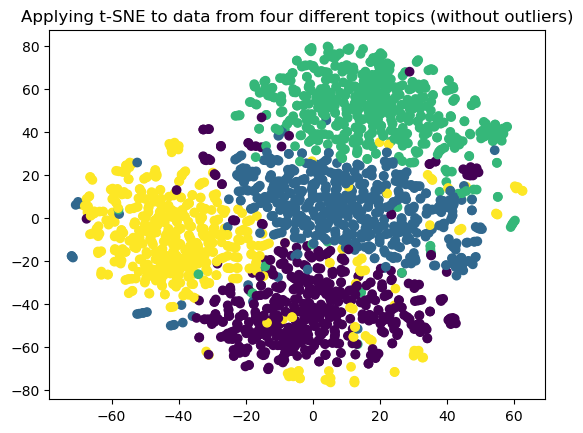

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

# Fetch the data
categories = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'sci.space']
groups = fetch_20newsgroups(categories=categories)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Collect the names for exclusion
all_names = set(names.words())

# Clean and lemmatize the documents
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() 
                           if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)

# Transform the cleaned data 
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)
data_vectors = vectorizer.fit_transform(data_cleaned)

# Apply t-SNE to visualize the document vectors
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_vectors.toarray())

# Calculate the centroid
centroid = np.mean(data_tsne, axis=0)

# Calculate distances from the centroid
distances = np.linalg.norm(data_tsne - centroid, axis=1)

# Determine the threshold for outliers (e.g., 2 standard deviations)
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify the outliers
outliers = data_tsne[distances > threshold]

# Remove the outliers
data_tsne = data_tsne[distances <= threshold]
target_list = groups.target[distances <= threshold]

# Plot the t-SNE visualization without outliers
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=target_list)
plt.title("Applying t-SNE to data from four different topics (without outliers)")
plt.show()

# Clustering newsgroups data using k-means


In [ ]:
# pip install --upgrade scipy

In [74]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_vectors)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [76]:
labels = groups_4.target
label_names = groups_4.target_names

clusters = kmeans.labels_

In [77]:
from collections import Counter
print(Counter(clusters))

Counter({1: 755, 0: 589, 2: 517, 3: 511})


We also take a closer look at the clusters by examining what they contain and the top 10 terms (the terms with the 10 highest tf-idf) representing each cluster:

In [78]:
import numpy as np

cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}
terms = vectorizer.get_feature_names_out()
centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print(f'cluster_{cluster}: {len(index_list)} samples')
    for label_index, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        print(f'{label_names[label_index]}: {count} samples')
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]: 
        print(' %s' % terms[ind], end="")
    print()
    print()

cluster_0: 589 samples
rec.motorcycles: 552 samples
comp.graphics: 19 samples
sci.space: 9 samples
rec.sport.baseball: 9 samples
Top 10 terms:
 dog bmw ride just motorcycle like dod article wa bike

cluster_1: 755 samples
comp.graphics: 559 samples
sci.space: 85 samples
rec.sport.baseball: 70 samples
rec.motorcycles: 41 samples
Top 10 terms:
 looking computer doe thanks program know image file university graphic

cluster_2: 517 samples
rec.sport.baseball: 515 samples
sci.space: 1 samples
rec.motorcycles: 1 samples
Top 10 terms:
 run jewish win ha article player baseball team game wa

cluster_3: 511 samples
sci.space: 498 samples
comp.graphics: 6 samples
rec.motorcycles: 4 samples
rec.sport.baseball: 3 samples
Top 10 terms:
 shuttle lunar like launch moon just nasa article wa space



# Topic modeling using [NMF](https://scikit-learn.org/stable/modules/decomposition.html#non-negative-matrix-factorization-nmf-or-nnmf)

In the context of topic modeling, a topic refers to a group of words that are interconnected.

**Non-negative matrix factorization (NMF)** is a linear algebra technique used to decompose an input matrix, $V$, into two smaller matrices, $W$ and $H$. These matrices have **no negative values**. In NLP, 

* $V$ represents a term count or tf-idf matrix with $n$ documents (samples) and $m$ terms. 

* $W$ is the feature matrix with $t$ topics and $m$ terms, where each row represents a topic and its associated term ranks. 

* $H$ is the coefficient matrix with $n$ documents and $t$ topics, where each row represents a document and its topic weights.

For more information about NMF, see the original paper [Generalized Nonnegative Matrix Approximations with Bregman Divergences, by Inderjit S. Dhillon and Suvrit Sra, in NIPS 2005](https://proceedings.neurips.cc/paper/2005/hash/d58e2f077670f4de9cd7963c857f2534-Abstract.html).

Scikit-learn has a module for decomposition that includes NMF. The number of components - in the context of topic modeling, corresponds to the number of topics. If `None`, it becomes the number of input features.

In [89]:
from sklearn.decomposition import NMF
n_comp = 10
nmf = NMF(n_components=n_comp, random_state=42)

In [90]:
nmf.fit(data_vectors)

NMF(n_components=10, random_state=42)

In [91]:
# We display the top 10 terms based on their ranks

terms = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 0:
did just said got think time year article like wa
Topic 1:
thanks format university package color know program graphic file image
Topic 2:
digest science satellite center international launch station shuttle nasa space
Topic 3:
advice bmw riding article helmet dog motorcycle ride dod bike
Topic 4:
past hank brain racking lame john sandy come baseball jewish
Topic 5:
forum learn discussing convenience post just group split aspect newsgroup
Topic 6:
tiger cub red sox brave run pitching win game team
Topic 7:
looking line vga algorithm mode needed point fast routine polygon
Topic 8:
dave ha rbi year hit alomar better hall good player
Topic 9:
article prize just toronto orbit zoology cost billion lunar moon


# Topic modeling using [LDA](https://scikit-learn.org/stable/modules/decomposition.html#latent-dirichlet-allocation-lda)

**Latent Dirichlet allocation (LDA)** is a generative probabilistic graphical model that explains each input document by utilizing a combination of topics with specific probabilities.  




In [92]:
from sklearn.decomposition import LatentDirichletAllocation
n_comp = 10
lda = LatentDirichletAllocation(n_components=n_comp,
                                learning_method='batch',
                                random_state=42)

In [93]:
lda.fit(data_vectors)

LatentDirichletAllocation(random_state=42)

In [94]:
terms = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))

Topic 0:
new bike space university ha know just like article wa
Topic 1:
updatedir ranck spring owner discussing moa advertising split aspect newsgroup
Topic 2:
ati racking sandy lame horn john hank come baseball jewish
Topic 3:
howland bmwmoa curt meddle vax cable sabre carderock cobra lock
Topic 4:
hit yankee fan baseball pitching brave player win game team
Topic 5:
clutch maddux watch talent ahead ann clemens lefebvre michigan cub
Topic 6:
manned countersteering nuclear speedstar vesa jet propulsion driver mission space
Topic 7:
centaur shadow plastic observation planet twist nick object ether helmet
Topic 8:
sticker curtis bikers wave card duke tire hawk dod handling
Topic 9:
video philosophical mode writes gif viewer tiff file vga cview
